In [71]:
from sklearn.datasets import fetch_california_housing
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("/workspace/KordsaIntroML/Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [73]:
# /workspace/KordsaIntroML/Datasets/diabetes.csv
df.shape

(769, 9)

In [74]:
dfCopy = df.copy()

In [75]:
dfCopy = dfCopy[dfCopy["BMI"]>12]

<Axes: >

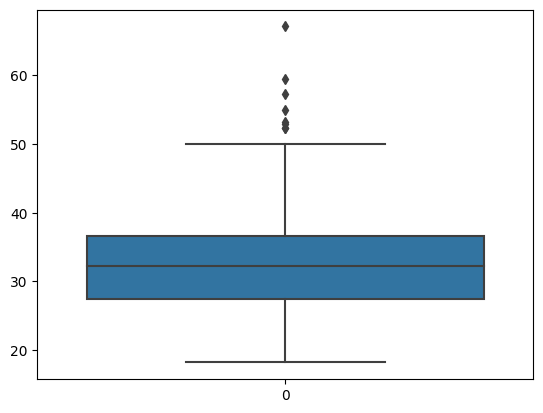

In [79]:
sns.boxplot(dfCopy["BMI"])

<Axes: >

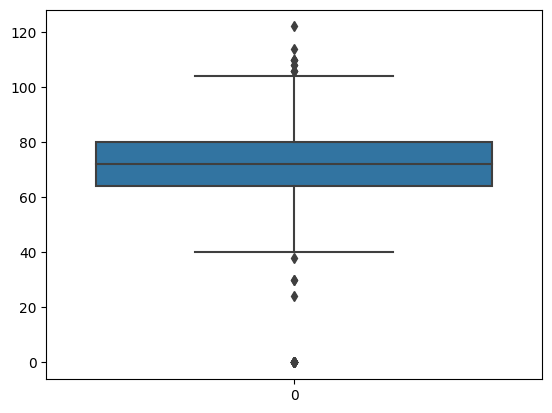

In [80]:
sns.boxplot(dfCopy["BloodPressure"])

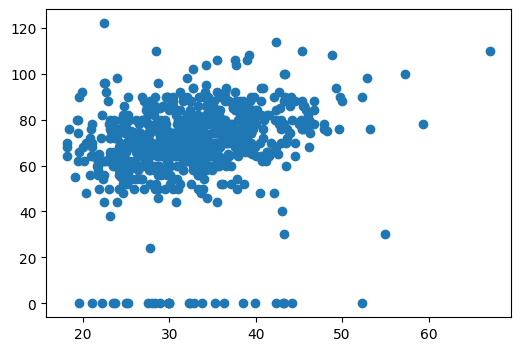

In [84]:
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(dfCopy["BMI"],dfCopy["BloodPressure"])

<Axes: ylabel='Frequency'>

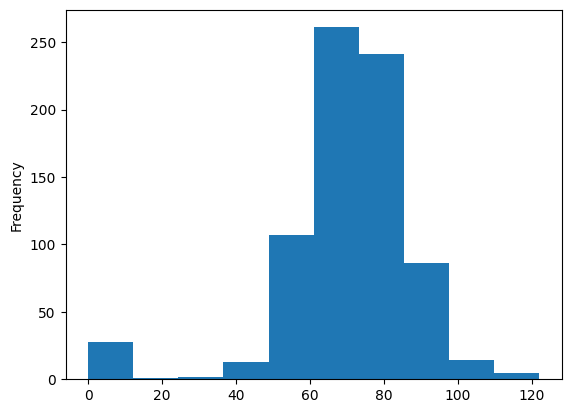

In [87]:
dfCopy["BloodPressure"].plot(kind="hist")

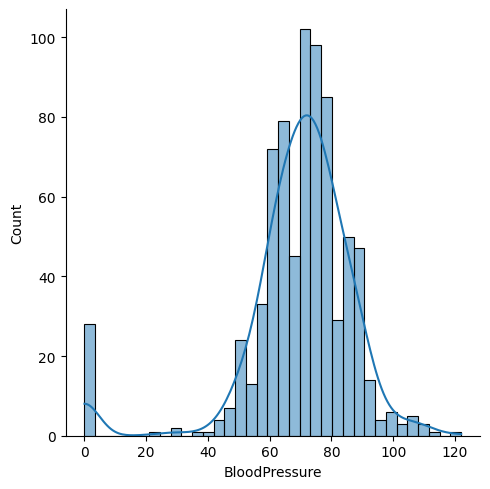

In [88]:
sns.displot(dfCopy["BloodPressure"],kde=True)

In [91]:
from scipy import stats
z = np.abs(stats.zscore(dfCopy["Age"]))
print(z)

0      1.427294
1      1.427294
2      0.196907
3      0.111423
4      1.051750
         ...   
764    2.538589
765    0.538844
766    0.282391
767    1.170841
768    0.880781
Name: Age, Length: 758, dtype: float64


In [92]:
threshold = 2
print(np.where(z>2))

(array([ 12,  13,  28,  30,  52,  90, 112, 120, 126, 144, 182, 202, 208,
       217, 219, 259, 274, 290, 295, 315, 340, 357, 358, 359, 370, 383,
       447, 450, 453, 469, 473, 481, 483, 488, 502, 505, 512, 529, 544,
       549, 571, 574, 658, 666, 749, 753]),)


In [94]:
Q1 = np.percentile(df["BMI"],25,method="midpoint")
Q3 = np.percentile(df["BMI"],75,method="midpoint")
IQR = Q3-Q1
print(IQR)

9.3


In [95]:
upper = Q3+1.5*IQR
upperdizi = np.array(df["BMI"]>=upper)
print(upperdizi.sum())

8


In [97]:
lower = Q1-1.5*IQR
lowerdizi = np.array(df["BMI"]<=lower)
print(lowerdizi.sum())

11


In [99]:
upper = Q3+1.5*IQR
upperdizi = np.where(df["BMI"]>=upper)[0]
upperdizi

array([121, 126, 178, 194, 248, 304, 446, 674])

In [100]:
lower = Q1-1.5*IQR
lowerdizi = np.where(df["BMI"]<=lower)[0]
lowerdizi

array([ 10,  50,  61,  82, 146, 372, 427, 495, 523, 685, 707])

In [104]:
dfTemiz = df.copy()

In [105]:
dfTemiz.drop(upperdizi,axis=0,inplace=True)

In [106]:
dfTemiz.drop(lowerdizi,axis=0,inplace=True)

<Axes: >

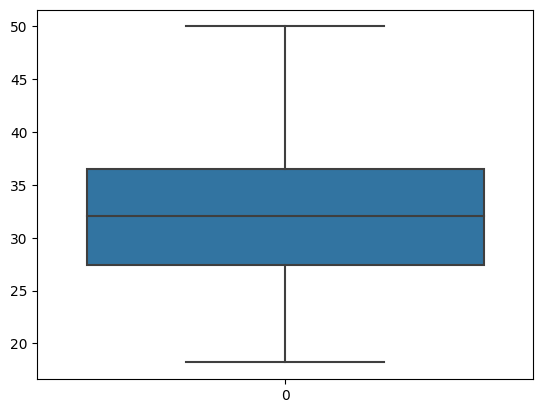

In [107]:
sns.boxplot(dfTemiz["BMI"])

<Axes: >

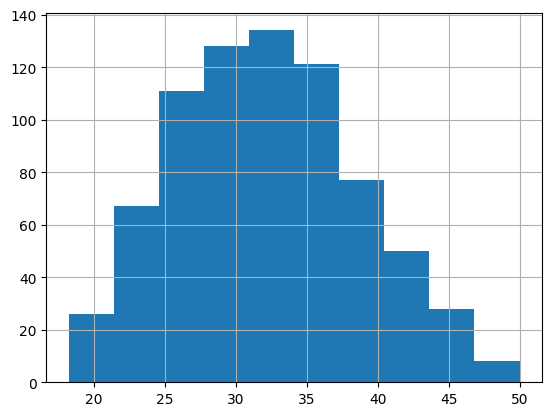

In [108]:
dfTemiz["BMI"].hist()

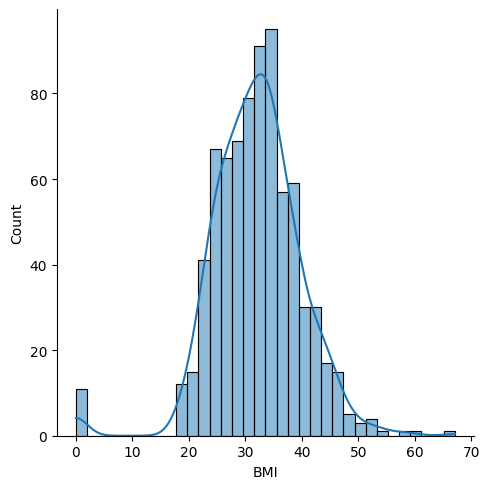

In [109]:
sns.displot(df["BMI"],kde=True)

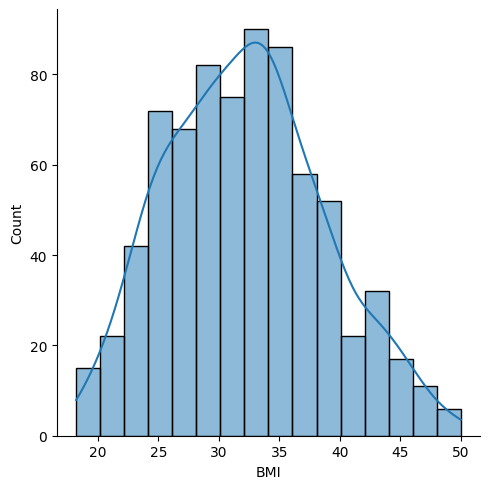

In [111]:
sns.displot(dfTemiz["BMI"],kde=True)